## 参数模型三步骤
1. 设置包含参数的模型（数学公式）
2. 设定评价参数的标准
3. 确定获得最优评价的参数

## 1. 分割平面的直线方程
记一次函数$f(x,y)=w_0+w_1*x+w_2*y$，则函数$f(x,y)=0$将平面分成两部分，可以同过$f(x,y)$函数值的正负来区分两个区域，且$f(x,y)$值的绝对值越大，表示该点距离分割线$f(x,y)=0$越远，具体的给定一次函数$f(x,y)=-10+3*x+2*y$，如图所示：  
<img src="./data/learn_WML_chapter_4_直线分割平面示意图.jpg" width=70% />  
此时用直线$f(x,y)=0$分割$(x,y)$这一平面是为了个属性为$t=\pm1$的两种数据分类：  
$$
\left\{\begin{matrix}
f(x,y)>0 \Rightarrow t= + 1
\\ 
f(x,y)<0 \Rightarrow t= - 1
\end{matrix}\right.
$$
此时对于训练数据集$\{(x_n,y_n,t_n)\}_{n=1}^N$，可以通过下面的规则来判断分类正误：  
$$
\left\{\begin{matrix}
f(x_n,y_n) \times t_n >0 :right
\\ 
f(x_n,y_n) \times t_n \leqslant 0 :error
\end{matrix}\right.
$$
这时训练集中的数据点到直线$f(x,y)=0$之间的距离（即$f(x,y)$的值的绝对值）体现了判断错误的程度，因此采用单点误差：$E_n=\left | f(x_n,y_n) \right |$,则整个训练集的误差为$E=\sum_{n}{E_n} =\sum_n\left | f(x_n,y_n) \right |$，其中求和符号表示对所有误分类的点误差求和，而误分类的点判断函数不大于0，则$\left | f(x_n,y_n) \right |=-f(x_n,y_n)\times t_n$，进而总的误差可以表示为：
$$E= - \sum_n f(x_n,y_n)t_n = - \sum_n(w_0+w_1*x+w_2*y)t_n=-\sum_nt_nW^T\phi_n$$
其中$W=\begin{pmatrix} w_0 \\ w_1 \\ w_2 \end{pmatrix}$,$\phi=\begin{pmatrix} 1 \\ x_n \\ y_n \end{pmatrix}$  

至此，我们已经确定了数学模型$f(x,y)$，误差评价函数E，和需要优化的参数W
## 2. 概率梯度下降法
所谓梯度下降，就是沿梯度向量的反方向对参数进行修正，梯度方向即是函数值变换最快的方向。而采取概率梯度下降则是由于算力限制，每次只是概率性采样整个数据集的一部分进行计算，也就是随机梯度下降。如下图所示：
![概率梯度下降法](./data/learn_WML_chapter_4_概率梯度下降法.jpg "概率梯度下降法")  

### 【1】在数据完全分类的情况下，W会收敛到一个特定值不再变化，这体现了只有“未正确分类的点”才有修正W的效果
### 【2】数据不能完全分开的情况下，W会一直变化，不能收敛到特定值，因此在W变化振荡幅度不大时即认为达到了最优值

## 3. 对角项的任意性与算法收敛速度
![对角项的任意性与算法收敛速度](./data/learn_WML_chapter_4_对角项.jpg "对角项的任意性与算法收敛速度")
## 4. 感知器算法与对角项的几何学解释

## 5. 概率梯度下降的代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
def prepare_dataset(n_1,mu_1,variance_l,n_2,mu_2,variance_2):
    df1=pd.DataFrame(np.random.multivariate_normal(mu_1,np.eye(2)*variance_l,n_1),columns=["x","y"])
    df2=pd.DataFrame(np.random.multivariate_normal(mu_2,np.eye(2)*variance_2,n_2),columns=["x","y"])
    df1["type"]=1
    df2["type"]=-1
    df=pd.concat([df1,df2],ignore_index=True)
    df=df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

def run_train(train_set,num_iteration=30):
    w0=w1=w2=0 # 参数初始化
    bias=0.5*(train_set.x.abs().mean()+train_set.y.abs().mean())  # 对角项修正
    
    # 迭代30次进行参数更新
    paramhist=pd.DataFrame([[w0,w1,w2]],columns=["w0","w1","w2"])
    for i in range(num_iteration):
        for index,point in train_set.iterrows():
            x,y,type=point.x,point.y,point.type
            if type*(w0*bias+w1*x+w2*y) <=0:
                w0+=type*bias
                w1+=type*x
                w2+=type*y
        paramhist=paramhist.append(pd.Series([w0,w1,w2],["w0","w1","w2"]),ignore_index=True)
    
    # 计算误差
    err=0.0
    for index,point in train_set.iterrows():
        x,y,type=point.x,point.y,point.type
        if type*(w0*bias+w1*x+w2*y) <=0:
            err+=1
    err_rate=err*100/len(train_set)
    return paramhist,err_rate

def show_result(subplot,train_set,params,err_rate):
    train_set_1=train_set[train_set.type==1]
    train_set_2=train_set[train_set.type==-1]
    bias=0.5*(train_set.x.abs().mean()+train_set.y.abs().mean())
    
    subplot.set_ylim([train_set.y.min()-5,train_set.y.max()+10])
    subplot.set_xlim([train_set.x.min()-5,train_set.x.max()+10])
    subplot.scatter(train_set_1.x,train_set_1.y,marker="o",label="+1")
    subplot.scatter(train_set_2.x,train_set_2.y,marker="x",label="-1")
    
    linex=np.arange(train_set.x.min()-10,train_set.x.max()+15)
    liney=-linex*params.w1/params.w2-bias*params.w0/params.w2
    label="Error rate = {:.2f}%".format(err_rate)
    subplot.plot(linex,liney,label=label,color="red")
    subplot.legend(loc=1)

## 5.1. 数据分布可以用直线完全分离

In [47]:
def prepare_dataset(n_1,mu_1,variance_l,n_2,mu_2,variance_2):
    df1=pd.DataFrame(np.random.multivariate_normal(mu_1,np.eye(2)*variance_l,n_1),columns=["x","y"])
    df2=pd.DataFrame(np.random.multivariate_normal(mu_2,np.eye(2)*variance_2,n_2),columns=["x","y"])
    df1["type"]=1
    df2["type"]=-1
    df=pd.concat([df1,df2],ignore_index=True)
    df=df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

def run_train(train_set,num_iteration=30):
    w0=w1=w2=0 # 参数初始化
    bias=0.5*(train_set.x.abs().mean()+train_set.y.abs().mean())  # 对角项修正
    
    # 迭代30次进行参数更新
    paramhist=pd.DataFrame([[w0,w1,w2]],columns=["w0","w1","w2"])
    for i in range(num_iteration):
        for index,point in train_set.iterrows():
            x,y,type=point.x,point.y,point.type
            if type*(w0*bias+w1*x+w2*y) <=0:
                w0+=type*bias
                w1+=type*x
                w2+=type*y
        paramhist=paramhist.append(pd.Series([w0,w1,w2],["w0","w1","w2"]),ignore_index=True)
    
    # 计算误差
    err=0.0
    for index,point in train_set.iterrows():
        x,y,type=point.x,point.y,point.type
        if type*(w0*bias+w1*x+w2*y) <=0:
            err+=1
    err_rate=err*100/len(train_set)
    return paramhist,err_rate

def show_result(subplot,train_set,params,err_rate):
    train_set_1=train_set[train_set.type==1]
    train_set_2=train_set[train_set.type==-1]
    bias=0.5*(train_set.x.abs().mean()+train_set.y.abs().mean())
    
    subplot.set_ylim([train_set.y.min()-5,train_set.y.max()+10])
    subplot.set_xlim([train_set.x.min()-5,train_set.x.max()+10])
    subplot.scatter(train_set_1.x,train_set_1.y,marker="o",label="+1")
    subplot.scatter(train_set_2.x,train_set_2.y,marker="x",label="-1")
    
    linex=np.arange(train_set.x.min()-10,train_set.x.max()+15)
    liney=-linex*float(params.w1)/float(params.w2)-bias*float(params.w0)/float(params.w2)
    label="Error rate = {:.2f}%".format(err_rate)
    subplot.plot(linex,liney,label=label,color="red")
    subplot.legend(loc=1)

In [59]:
train_set=prepare_dataset(20,[15,10],15,30,[0,0],15)
train_set[:10]

,x,y,type
0,-1.117881,6.544039,-1
1,10.386243,14.912451,1
2,2.535912,7.971801,-1
3,-5.521829,-5.233182,-1
4,10.784113,8.038449,1
5,1.126296,-3.398964,-1
6,-0.572510,-4.701148,-1
7,0.939759,1.633065,-1
8,-1.458996,-0.006329,-1
9,2.247207,-1.719616,-1


In [60]:
# 迭代训练
paramhist,err_rate=run_train(train_set,30)
paramhist[:5]

,w0,w1,w2
0,0.000000,0.000000,0.000000
1,-21.391305,9.223090,4.419862
2,-21.391305,9.748745,12.665594
3,-21.391305,11.288427,12.401802
4,-21.391305,11.288427,12.401802


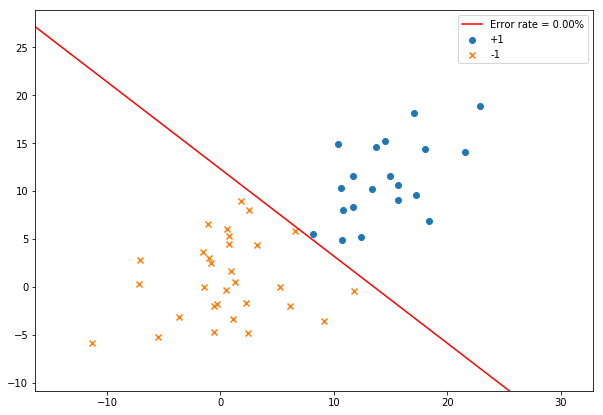

In [61]:
# 显示结果
fig=plt.figure(figsize=(10,7))
subplot=fig.add_subplot(1,1,1)
params=paramhist[-1:]
show_result(subplot,train_set,params,err_rate)

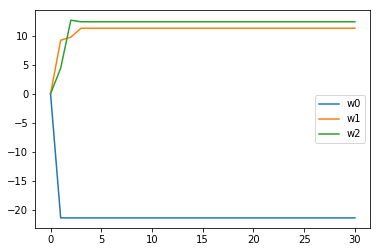

In [62]:
paramhist.plot().legend()

## 5.2. 数据分布无法用直线完全分离

In [65]:
train_set_2=prepare_dataset(20,[15,10],30,30,[0,0],30)

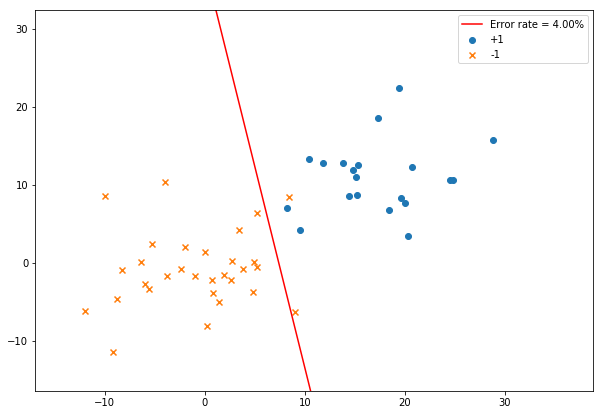

In [73]:
paramhist_2,err_rate_2=run_train(train_set_2)
fig_2=plt.figure(figsize=(10,7))
subplot_2=fig_2.add_subplot(1,1,1)
params_2=paramhist_2[-1:]
show_result(subplot_2,train_set_2,params_2,err_rate_2)

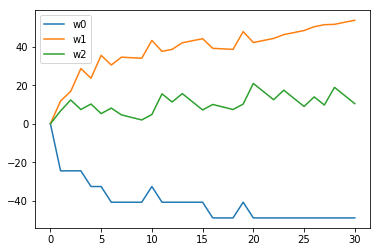

In [71]:
paramhist_2.plot().legend()

###  增加训练轮次，从30次到300，同一数据下查看对比效果

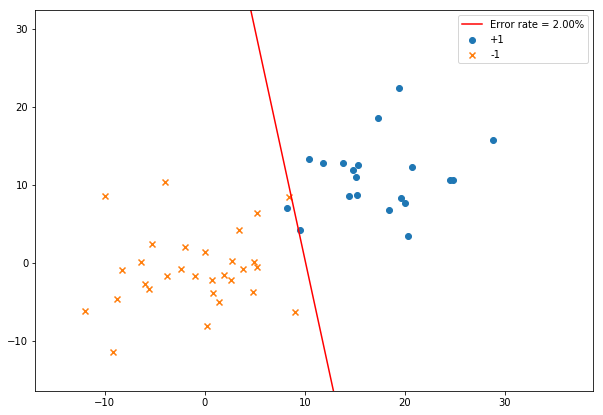

In [74]:
paramhist_3,err_rate_3=run_train(train_set_2,num_iteration=300)
fig_3=plt.figure(figsize=(10,7))
subplot_3=fig_3.add_subplot(1,1,1)
params_3=paramhist_3[-1:]
show_result(subplot_3,train_set_2,params_3,err_rate_3)

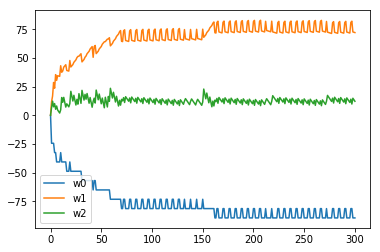

In [75]:
paramhist_3.plot().legend()